<a href="https://colab.research.google.com/github/IDF13/mulcam_army/blob/sumin/Artists_Aspect_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# -*- coding: utf-8 -*-
"""k-means_code.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Ls1XFeatzdMivoFijtX0MuN9E7ADviAC
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

"""# 데이터 불러오기
댓글을 얼마나 불러와야 할까
"""


import os

path = '/content/drive/MyDrive/[공유] Mulcam_Army 공유폴더!/크롤링 한 자료/k-pop_Radar아티스트 크롤링 할당분/수민_결과물/전처리 완료/'
file_list = os.listdir(path)
# file_list_py = [file for file in file_list if file.endswith('.csv')] ## 파일명 끝이 .csv인 경우

## csv 파일들을 DataFrame으로 불러와서 concat

df = pd.DataFrame()
for i in file_list:
    data = pd.read_csv(path + i, encoding='utf-8', header=None, engine='python')
    df = pd.concat([df,data])
    
df = df.reset_index(drop=True)
df

,0,1,2
0,even if you re not a carat let s all admit it ...,28000.0,(en)
1,this song tells that some song s don t need bi...,1900.0,(en)
2,외국분들 댓글 너무 착하셔세봉이들이 보고 감동했으면 좋겠네요,72.0,(ko)
3,not a fan but i should say that this song is o...,625.0,(en)
4,4 years have passed and this song is still a l...,96.0,(en)
...,...,...,...
2319905,or the rapper,0.0,(en)
2319906,yes yes,0.0,(en)
2319907,the guy in the middle,0.0,(en)
2319908,victon 00 11 han seungwoo [ leader rapper voca...,0.0,(en)


In [13]:
df.columns = ['comment','like','lang']
# len(df['comment'])
df.head()

,comment,like,lang
0,even if you re not a carat let s all admit it ...,28000.0,(en)
1,this song tells that some song s don t need bi...,1900.0,(en)
2,외국분들 댓글 너무 착하셔세봉이들이 보고 감동했으면 좋겠네요,72.0,(ko)
3,not a fan but i should say that this song is o...,625.0,(en)
4,4 years have passed and this song is still a l...,96.0,(en)


In [15]:
df['comment']

0          even if you re not a carat let s all admit it ...
1          this song tells that some song s don t need bi...
2                          외국분들 댓글 너무 착하셔세봉이들이 보고 감동했으면 좋겠네요
3          not a fan but i should say that this song is o...
4          4 years have passed and this song is still a l...
                                 ...                        
2319905                                        or the rapper
2319906                                              yes yes
2319907                                the guy in the middle
2319908    victon 00 11 han seungwoo [ leader rapper voca...
2319909                                       omg thanks fam
Name: comment, Length: 2319910, dtype: object

In [19]:
data_ko = pd.DataFrame([kor[:1] for kor in df.values if kor[2] == '(ko)'], columns=['comment'])
data_en = pd.DataFrame([en[:1] for en in df.values if en[2] == '(en)'], columns=['comment'])
data_en.comment
len(data_en)

1803300

In [23]:
data_en

,comment
0,even if you re not a carat let s all admit it ...
1,this song tells that some song s don t need bi...
2,not a fan but i should say that this song is o...
3,4 years have passed and this song is still a l...
4,i m not a fan of them but i really like all of...
...,...
1803295,or the rapper
1803296,yes yes
1803297,the guy in the middle
1803298,victon 00 11 han seungwoo [ leader rapper voca...


In [ ]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import re

for i in range(len(data_en.comment)):
    data_en.comment[i] = str(data_en.comment[i])

# 숫자제거 / 밑줄 제외한 특수문자 제거
p = re.compile("[0-7]+")
z = re.compile("[8-9]+")
q = re.compile("\W+")
r = re.compile('[^a-zA-Z]+')

en = []
for i in data_en.comment:
    tokens = re.sub(p," ",i)
    tokens = re.sub(z," ",tokens)
    tokens = re.sub(q," ",tokens)
    tokens = re.sub(r," ", tokens)
    en.append(tokens)
len(en)
en[:2]

In [ ]:
# 불용어 제거
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words('english')) 
# stop_words.update(('song','group','songs','youtube','views','time','https','girl','girls','people','yes','lol','video','part','member','members', 'look','way','guys','fans','fan'))

res=[]
for i in range(len(en)):
    word_tokens = word_tokenize(en[i])

    result = []
    for w in word_tokens: 
        if w not in stop_words: 
            result.append(w) 
    res.append(result)


In [ ]:
# stemming/


from nltk.stem import PosterStemmer, LancasterStemmer

st1 = PosterStemmer()
st2 = LancasterStemmer()

words = ['fly', 'flies', 'flying', 'flew', 'flown']

print("Poster Stemmer :', [st1.stem(w) for w in words])
print("Lancaster Stemmer :", [st2.stem(w) for w in words])

from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()
print([lm.lemmatize(w, pos='v') for w in words])

# http://www.dinnopartners.com/ml-%EC%9E%90%EC%97%B0%EC%96%B4-%EC%B2%98%EB%A6%AC-national-language-processing-2-nltk-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0/

In [ ]:

# print(word_tokens) 
print(res[:10])
print(len(res))

en_pos = []
for i in range(len(res)):
    tokens_pos = nltk.pos_tag(res[i])
    en_pos.append(tokens_pos)

en_pos[:5]


In [36]:
# 명사는 NN을 포함하고 있음을 알 수 있음
en_NN=[]
for i in range(len(en_pos)):
    NN_words = []
    for word, pos in en_pos[i]:
        if 'NN' in pos:
            NN_words.append(word)
        elif 'NN' in pos:
            NN_words.append(word)
    en_NN.extend(NN_words)
en_NN[:10]

['admit',
 'song',
 'universal',
 'song',
 'tells',
 'views',
 'fan',
 'level',
 'years',
 'song']

In [31]:
# 형용사

en_ADJ=[]
for i in range(len(en_pos)):
    JJ_words = []
    for word, pos in en_pos[i]:
        if 'JJ' in pos:
            JJ_words.append(word)
        elif 'JJ' in pos:
            JJ_words.append(word)
    en_ADJ.extend(JJ_words)
en_ADJ[:10]

['let',
 'song',
 'legendary',
 'different',
 'able',
 'new',
 'previous',
 'seventeen',
 'gose',
 'able']

In [32]:
# 동사

en_VB=[]
for i in range(len(en_pos)):
    VB_words = []
    for word, pos in en_pos[i]:
        if 'VB' in pos:
            VB_words.append(word)
        elif 'VB' in pos:
            VB_words.append(word)
    en_VB.extend(VB_words)
en_VB[:10]

['carat',
 'need',
 'prove',
 'say',
 'passed',
 'legend',
 'passed',
 'released',
 'boys',
 'struggle']

In [69]:
## 중복 삭제 

en_NN_uni= pd.unique(en_NN)
en_ADJ_uni= pd.unique(en_ADJ)
en_VB_uni= pd.unique(en_VB)

In [57]:
# a = pd.concat([en_NN_uni,en_ADJ_uni,en_VB_uni])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [71]:
data_en['df_NN_uni'] = pd.DataFrame(en_NN_uni)
# df_ADV = pd.DataFrame(en_ADV)
data_en['df_ADJ_uni'] = pd.DataFrame(en_ADJ_uni)
data_en['df_VB_uni'] = pd.DataFrame(en_VB_uni)

In [74]:
data_en

,comment,en_sent,df_NN,df_ADJ,df_VB,df_NN_uni,df_ADJ_uni,df_VB_uni
0,even if you re not a carat let s all admit it ...,even carat let admit song universal,admit,let,carat,admit,let,carat
1,this song tells that some song s don t need bi...,song tells song need billion views prove legen...,song,song,need,song,song,need
2,not a fan but i should say that this song is o...,fan say song another level,universal,legendary,prove,universal,legendary,prove
3,4 years have passed and this song is still a l...,years passed song still legend probably legacy...,song,different,say,tells,different,say
4,i m not a fan of them but i really like all of...,fan really like songs especially one deserves ...,tells,able,passed,views,able,passed
...,...,...,...,...,...,...,...,...
351506,jennifer marte t was me too apparently,jennifer marte apparently,christmas,small,let,NaN,NaN,NaN
351507,meeee,meeee,year,hard,checking,NaN,NaN,NaN
351508,me i was here i watched it like 3 times,watched like times,reveluv,nd,forget,NaN,NaN,NaN
351509,i was the 11th hehehe,hehehe,helium,dear,keep,NaN,NaN,NaN


In [ ]:
### csv로 저장 

# paths = '/content/drive/MyDrive/[공유] Mulcam_Army 공유폴더!/크롤링 한 자료/k-pop_Radar아티스트 크롤링 할당분/수민_결과물/전처리 완료/'

# df.to_csv(df_NN, paths + 'Artists_Noun.csv',encoding = "UTF-8")
# df.to_csv(df_ADJ, paths +"Artists_Adjective.csv",encoding = "UTF-8")
# df.to_csv(df_VB, paths +"Artists_Verb.csv",encoding = "UTF-8")

In [ ]:
# # make noun frequency graph per religion

# # from matplotlib.font_manager import fontproperties
# from matplotlib import font_manager,rc
# import matplotlib
# import matplotlib.pyplot as plt
 

# def make_top_word_graph( result, top ):
#     #tokens = result.split(" ") # 문자열을 공백 기준으로 구분
#     text = nltk.Text(tokens) # nltk 
#     topWord = text.vocab().most_common(top) # top n word 
#     count = 30 # top word on graph
#     xlist = [a[0] for a in topWord[:count ]]
#     ylist = [a[1] for a in topWord[:count ]]
    
#     plt.figure(0)

#     font_path = '/content/drive/MyDrive/(교육) 자연어 처리/위수민/cmmi10.ttf'
#     font_name = font_manager.FontProperties(fname=font_path, size=10).get_name()
#     rc('font', family=font_name) # 한글 적용

#     plt.xlabel('Word')
#     plt.xticks(rotation=70) # x축 라벨 회전
#     plt.ylabel('Count')
#     plt.title('keyword' +' TOP '+str(count)+' WORD')
#     plt.ylim([10, 33000]) # y축 범위 (최대값을 기준으로 동일하게 설정하기 위함)
#     plt.plot(xlist,ylist)
#     #plt.savefig(result_path+'top-word-graph.png', dpi=400)
    
#     # # make text file 
#     # make_top_file(topWord)

# make_top_word_graph(en_NN,5000)

In [44]:
# 자주 나오는 단어 제거

from collections import Counter

c = Counter(data_en.comment.values) # input type should be a list of words (or tokens)
k = 30
print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력

[(nan, 2338), ('same', 415), ('thank you', 352), ('me too', 342), ('me', 304), ('yes', 300), ('fighting', 279), ('welcome', 252), ('thanks', 149), ('true', 138), ('thank you so much', 126), ('i love this song', 109), ('same here', 108), ('wow', 107), ('here', 105), ('agree', 101), ('yesss', 89), ('yeah', 86), ('lol', 84), ('exactly', 80), ('welcome to the fandom', 79), ('masterpiece', 77), ('omg', 77), ('yess', 76), ('let s go', 72), ('i agree', 71), ('lmao', 70), ('love', 69), ('sejeong', 68), ('i love you', 66)]


In [62]:
# # 자주 나오는 단어 제거

# from collections import Counter

# c = Counter(a[0], axis=1) # input type should be a list of words (or tokens)
# k = 20
# print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력

[('admit', 3), ('song', 3), ('views', 3), ('fan', 3), ('level', 3), ('attacca', 3), ('hope', 3), ('reach', 3), ('milestone', 3), ('whilst', 3), ('work', 3), ('aim', 3), ('taste', 3), ('pay', 3), ('songs', 3), ('funfact', 3), ('comeback', 3), ('seventeen', 3), ('proof', 3), ('choreography', 3)]


In [101]:
# 자주 나오는 단어 제거

from collections import Counter

c = Counter(en_NN) # input type should be a list of words (or tokens)
k1 = 20
print(c.most_common(k1)) # 빈도수 기준 상위 k개 단어 출력

[('song', 31408), ('day', 15571), ('love', 14989), ('time', 10454), ('songs', 10207), ('group', 10143), ('mv', 10128), ('velvet', 9994), ('music', 9530), ('thank', 8739), ('views', 8053), ('comeback', 7752), ('people', 7039), ('support', 6069), ('guys', 5815), ('please', 5760), ('carats', 5595), ('thanks', 5499), ('fandom', 5367), ('year', 5320)]


In [33]:
from collections import Counter

c = Counter(en_ADJ) # input type should be a list of words (or tokens)
k = 20
print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력

[('good', 12214), ('red', 10824), ('best', 9454), ('much', 8582), ('seventeen', 8120), ('new', 8112), ('est', 8106), ('u', 7515), ('happy', 7344), ('many', 5135), ('song', 4969), ('bad', 4961), ('great', 4666), ('welcome', 4499), ('first', 4402), ('hard', 4327), ('beautiful', 4103), ('main', 3675), ('vocal', 3282), ('stan', 3216)]


In [35]:
from collections import Counter

c = Counter(en_VB) # input type should be a list of words (or tokens)
k = 20
print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력

[('love', 14784), ('know', 12084), ('get', 10110), ('let', 9349), ('go', 8375), ('make', 7670), ('got', 7442), ('fighting', 7081), ('think', 7021), ('keep', 6510), ('see', 5229), ('want', 5091), ('say', 4840), ('watching', 4079), ('going', 3844), ('said', 3779), ('talented', 3777), ('streaming', 3572), ('amazing', 3571), ('come', 3538)]


In [ ]:
# textrank 키워드추출

from collections import Counter
from collections import defaultdict
from scipy.sparse import csr_matrix
import numpy as np
from sklearn.preprocessing import normalize


def scan_vocabulary(sents, tokenize, min_count=2):
    counter = Counter(w for sent in sents for w in tokenize(sent))
    counter = {w:c for w,c in counter.items() if c >= min_count}
    idx_to_vocab = [w for w, _ in sorted(counter.items(), key=lambda x:-x[1])]
    vocab_to_idx = {vocab:idx for idx, vocab in enumerate(idx_to_vocab)}
    return idx_to_vocab, vocab_to_idx

def cooccurrence(tokens, vocab_to_idx, window=2, min_cooccurrence=2):
    counter = defaultdict(int)
    for s, tokens_i in enumerate(tokens):
        vocabs = [vocab_to_idx[w] for w in tokens_i if w in vocab_to_idx]
        n = len(vocabs)
        for i, v in enumerate(vocabs):
            if window <= 0:
                b, e = 0, n
            else:
                b = max(0, i - window)
                e = min(i + window, n)
            for j in range(b, e):
                if i == j:
                    continue
                counter[(v, vocabs[j])] += 1
                counter[(vocabs[j], v)] += 1
    counter = {k:v for k,v in counter.items() if v >= min_cooccurrence}
    n_vocabs = len(vocab_to_idx)
    return dict_to_mat(counter, n_vocabs, n_vocabs)

def dict_to_mat(d, n_rows, n_cols):
    rows, cols, data = [], [], []
    for (i, j), v in d.items():
        rows.append(i)
        cols.append(j)
        data.append(v)
    return csr_matrix((data, (rows, cols)), shape=(n_rows, n_cols))

def word_graph(sents, tokenize=None, min_count=2, window=2, min_cooccurrence=2):
    idx_to_vocab, vocab_to_idx = scan_vocabulary(sents, tokenize, min_count)
    tokens = [tokenize(sent) for sent in sents]
    g = cooccurrence(tokens, vocab_to_idx, window, min_cooccurrence, verbose)
    return g, idx_to_vocab

def pagerank(x, df=0.85, max_iter=30):
    assert 0 < df < 1

    # initialize
    A = normalize(x, axis=0, norm='l1')
    R = np.ones(A.shape[0]).reshape(-1,1)
    bias = (1 - df) * np.ones(A.shape[0]).reshape(-1,1)

    # iteration
    for _ in range(max_iter):
        R = df * (A * R) + bias

    return R

def textrank_keyword(sents, tokenize, min_count, window, min_cooccurrence, df=0.85, max_iter=30, topk=30):
    g, idx_to_vocab = word_graph(sents, tokenize, min_count, window, min_cooccurrence)
    R = pagerank(g, df, max_iter).reshape(-1)
    idxs = R.argsort()[-topk:]
    keywords = [(idx_to_vocab[idx], R[idx]) for idx in reversed(idxs)]
    return keywords

In [ ]:
# #wordclound
# noun_text = ''
# for word in en_NN:
#     noun_text = noun_text +' '+word
    
# path2='/content/drive/MyDrive/[공유] Mulcam_Army 공유폴더!/크롤링 한 자료/k-pop_Radar아티스트 크롤링 할당분/수민_결과물/전처리 완료/'
# filename = 'seventeen'

# wordcloud = WordCloud(max_font_size=60, relative_scaling=.5).generate(noun_text) # generate() 는 하나의 string value를 입력 받음
# plt.figure()
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()
# wordcloud.to_file(path2+'wordcloud'+filename+'.png')

In [63]:
## 3단어 이하 짧은 단어 제거
 # remove words less than three letters
# print(res[1])
# for word in res[1]:
#     print(word)
en_sent_less3=[]
for i in range(len(res)):
    tokens = [word for word in res[i] if len(word) >= 3]
    en_sent_less3.append(tokens)
en_sent_less3[:2]

[['even', 'carat', 'let', 'admit', 'song', 'universal'],
 ['song', 'tells', 'song', 'need', 'billion', 'views', 'prove', 'legendary']]

In [64]:
en_sent =[]
for i in range(len(en_sent_less3)):
    temp=" ".join(en_sent_less3[i])
    en_sent.append(temp)
en_sent[:15]

['even carat let admit song universal',
 'song tells song need billion views prove legendary',
 'fan say song another level',
 'years passed song still legend probably legacy passed different generation generation attacca released october hope able reach new milestone boys lately previous comebacks struggle make views together almost years ripe already still lack effort whilst seventeen work hard satisfy every menu aim make taste unending gose segments contents hope able pay back',
 'fan really like songs especially one deserves attention views',
 'funfact everyone agree successful comeback seventeen',
 'proof choreography need jumps flips beautifully done goes well music probably one favorites also video choreography danced speed left awe well synchronized',
 'forget fandom carat comes song',
 'proves songs need badass become addictive',
 'seventeen stan like guys deserves views likes masterpiece',
 'today wan cry year anniversary thank seventeen give masterpiece song',
 'remember wat

In [65]:
data_en['en_sent']=en_sent

In [66]:
data_en

,comment,en_sent
0,even if you re not a carat let s all admit it ...,even carat let admit song universal
1,this song tells that some song s don t need bi...,song tells song need billion views prove legen...
2,not a fan but i should say that this song is o...,fan say song another level
3,4 years have passed and this song is still a l...,years passed song still legend probably legacy...
4,i m not a fan of them but i really like all of...,fan really like songs especially one deserves ...
...,...,...
351506,jennifer marte t was me too apparently,jennifer marte apparently
351507,meeee,meeee
351508,me i was here i watched it like 3 times,watched like times
351509,i was the 11th hehehe,hehehe


# 벡터화

In [102]:
# TF_IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

# words = pd.DataFrame(en_NN)
# # len(docs)
# words

In [2]:
tfidf = TfidfVectorizer(stop_words = 'english', 
                        #min_df = 3,  # 3회 미만으로 등장하는 토큰은 무시
                        max_df = 0.95 # 많이 등장한 단어 5%의 토큰도 무시
                        )
words_tf = tfidf.fit_transform(en_NN)

# (stop_words='english')
# token_pattern='(?u)\\b\\w+\\b' or 't\w+'
# ngram_range : 단어장 생성에 필요한 토큰의 크기       
# list일 경우 : fit['']
# https://wikidocs.net/33661 -> tf-idf 매개변수

NameError: ignored

In [1]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters =4, 
            init='k-means++', 
            n_init=100,
            tol=1e-04, 
            random_state=0
            )
w_pred = km.fit(words_tf)
# km.fit_predict(X)

NameError: ignored

In [ ]:

np.unique(km.labels_)

cluster_label = km.labels_
words['cluster_label'] =  km.labels_
words[100:150]

# 감성사전

In [ ]:
# https://rpubs.com/baekdata/gabs
# 사전불러오기
knu=read.csv("data/KnuSentiLex-master/SentiWord_Dict.txt")

In [ ]:
# 데이터 준비
positive <- readLines(file("data/positive.txt", encoding = "EUC-KR"))
positive=positive[-1]

negative <- readLines(file("data/negative.txt", encoding = "EUC-KR"))
negative=negative[-1]
negative

In [ ]:
# 형태소 분석
txt <- readLines(file("data/sample_news.txt",encoding = "EUC-KR"))
pos=SimplePos22(txt)

In [ ]:
# 문장의 감정어휘 탐색
pos.vec=unlist(pos)
pos.vec

pos.vec<-gsub("[[:alpha:]]","",pos.vec) # 영어 삭제
pos.vec

pos.vec<-gsub("/","",pos.vec) # /삭제
pos.vec

pos.vec<-gsub("[+ㄱㄴ]","",pos.vec) # +,ㄱ,ㄴ삭제
pos.vec

pos.matches.num<-match(pos.vec,positive) # 긍정어 벡터 번호
neg.matches.num<-match(pos.vec,negative) # 부정어 벡터 번호 

pos.matches.num ; neg.matches.num

pos.matches <- !is.na(pos.matches.num)
neg.matches <- !is.na(neg.matches.num)

pos.sum=sum(pos.matches)
neg.sum=sum(neg.matches)
pos.sum ; neg.sum

In [ ]:
result <- pos.sum-neg.sum

if(result>0){
  print("긍정")
}else if(result==0){
  print("중립")
}else{
  print("부정")
}

In [ ]:
sigmoid <- function(x){
  1/(1+exp(-x))
}

x=seq(from=-5,to=5,by=0.1)
plot(x,sigmoid(x),col="red")

In [ ]:
# 패키지 사용할시
# 패키지 설치

library(devtools)
install_github("SukJaeChoi/easySenti")
library(easySenti)

In [ ]:
# 데이터 준비
positive <- readLines(file("data/positive.txt", encoding = "EUC-KR"))
positive=positive[-1]
positive

negative <- readLines(file("data/negative.txt", encoding = "EUC-KR"))
negative=negative[-1]
negative

docs <- readLines(file("data/sample_news.txt",encoding = "EUC-KR"))

In [ ]:
# 감성값 계산
easySenti(docs,positive,negative)
easySenti(docs,positive,negative,t=3) # 3초과 긍정 
easySenti(docs,positive,negative,sigmoid = TRUE) # 시그모이드, 경계값 0.3
easySenti(docs,positive,negative,sigmoid = TRUE, t.s=0.5) # 시그모이드, 경계값 0.5

# 여기까지

In [ ]:



# df

"""
1. 토큰화_nltk

2. TF-IDF 벡터화

3. K-Means clustering_군집개수가 x인 k-평균을 실시한 후, 군집별로 핵심 단어를 상위 10개씩 추출한다.

4. topic modeling(LDA)_k-평균을 실시한 것 중 상위 카테고리가 명확하고
세부 군집이 필요 없는 5개 군집에 토픽모
델링을 적용하여 군집별로 10개의 단어를 뽑아낸다.



https://www.koreascience.or.kr/article/CFKO201924664106139.pdf"""

In [ ]:
# TF_IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

docs = en_NN
# len(docs)

tfidf = TfidfVectorizer(stop_words=None, 
                        min_df = 3,  # 3회 미만으로 등장하는 토큰은 무시
                        max_df =0.95 # 많이 등장한 단어 5%의 토큰도 무시
                        )

docs_tf = tfidf.fit_transform(docs)

# (stop_words='english')
# token_pattern='(?u)\\b\\w+\\b' or 't\w+'
# ngram_range : 단어장 생성에 필요한 토큰의 크기       
# list일 경우 : fit['']
# https://wikidocs.net/33661 -> tf-idf 매개변수

In [ ]:
"""# K-Means clustering"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# 최적의 군집 찾기

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(docs_tf)
    distortions.append(km.inertia_) # 군집 내 분산, 적을수록 좋음

distortions

centers = km.cluster_centers_
print(centers)

[[3.67570482e-05 9.49557078e-05 7.04510090e-05 ... 2.06758396e-05
  8.42349020e-06 3.06308735e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


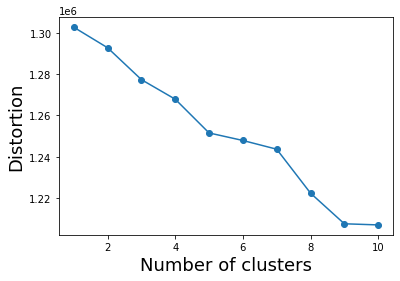

In [ ]:
# 최적의 군집 시각화(급격하게 줄어드는 부분)

import matplotlib.pyplot as plt
import numpy as np

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters', fontsize=18)
plt.ylabel('Distortion', fontsize=18)
plt.show() # k=5

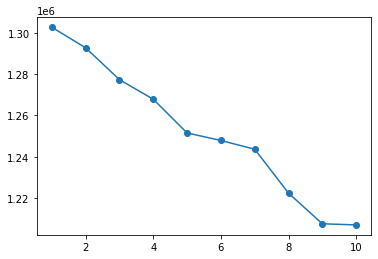

In [ ]:
plt.plot(range(1, 11), distortions, marker='o')
plt.savefig('/content/drive/MyDrive/[공유] Mulcam_Army 공유폴더!/크롤링 한 자료/k-pop_Radar아티스트 크롤링 할당분/수민_결과물/k-means++_10artists',  dpi=200, facecolor='#eeeeee', bbox_inches='tight')

In [ ]:
km.inertia_

1206974.6904481144

In [ ]:
# ds = pd.DataFrame(docs_tf)
X = np.array(distortions)
data_points = X.reshape(-1,1)
# X = np.array(docs_tf, dtype = object)
# X = np.array(docs_tf).reshape(-1,1)
# X_2 = np.reshape(X,(-1,1))

# X = np.array(distortions)
# K = 2

# data_points = distortions # 변수를 만들어 데이터프레임 값들을 numpy(array) 값으로 초기화
# km = KMeans(n_clusters=5, n_init=100, max_iter=10000, tol=1e-04, random_state=0).fit(data_points) # kmeans++ 적용(init의 디폴트값)

cluster_centers = km.cluster_centers_ # 중심점 확인. 실행할 때마다 중심값이 달라짐

cluster_centers.shape

(10, 22553)